In [1]:
%matplotlib inline
import logging
import pyobsbox
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from dtaidistance import clustering

In [2]:
cp_dir = '../data_checkpoints/checkpoint7/'
logging.basicConfig(format='%(asctime)s-%(name)s-%(levelname)s: %(message)s', level=logging.INFO)
# path to preprocessed features, extracted from obsbox data:
feature_path = '/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/runs_lcoyle/B1H/'
load = True

In [3]:
obtraining = pyobsbox.OBTraining(feature_path, verbose=10)
obtraining.load_features_meta()

Loading files: 100%|██████████| 37/37 [01:23<00:00,  2.36s/it]


In [4]:
obtraining.load_checkpoint(cp_dir)

# Time Series clustering
Using dynamic time warping (DTW) as a distance metric between the times series, for the anomalous data, as determined by the isolation forest.

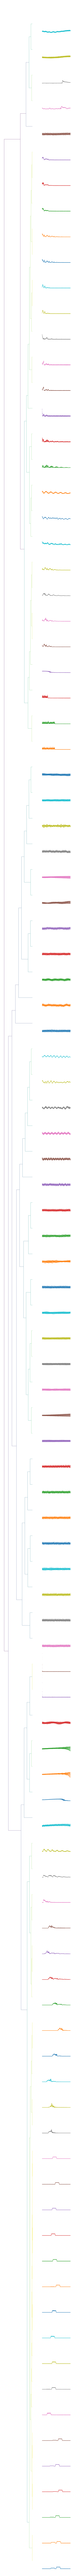

In [16]:
# subsample for plotting
subsample = 100
chosen = np.random.choice(np.arange(obtraining.ts_data.shape[1]),
                          subsample,
                          replace=False)

tree_model = clustering.LinkageTree(dists_fun=None)
tree_model.fit(np.matrix(obtraining.ts_data.T[chosen, :]), dists=obtraining.dists[chosen, :][:, chosen])
fig, ax = tree_model.plot(linewidth=0, marker='.', markersize=1)
fig.tight_layout()
fig.set_size_inches(10, 400)
plt.savefig('linkage_tree.png')